# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [143]:
# Load data
url = "https://docs.google.com/spreadsheets/d/1-x8hz_KfX4qg-GDp6i4WZzNG9pp7b0KaEO_pJwFGrwU/export?format=xlsx"

# langsung baca sebagai excel
df = pd.read_excel(url)

In [144]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [145]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2508 non-null   object        
 1   AccountID                2516 non-null   object        
 2   TransactionAmount        2511 non-null   float64       
 3   PreviousTransactionDate  2509 non-null   datetime64[ns]
 4   TransactionType          2507 non-null   object        
 5   Location                 2507 non-null   object        
 6   DeviceID                 2507 non-null   object        
 7   IP Address               2517 non-null   object        
 8   MerchantID               2514 non-null   object        
 9   Channel                  2510 non-null   object        
 10  CustomerAge              2519 non-null   float64       
 11  CustomerOccupation       2514 non-null   object        
 12  TransactionDuration      2511 non-

In [146]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,PreviousTransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
count,2511.000000,2509,2519.000000,2511.000000,2516.000000,2510.000000,2513
mean,297.656468,2023-07-05 17:33:20.831805440,44.678444,119.422939,1.121622,5113.438124,2024-11-04 08:09:22.576999424
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,81.310000,2023-04-03 16:14:34,27.000000,63.000000,1.000000,1504.727500,2024-11-04 08:07:54
50%,211.360000,2023-07-07 17:40:58,45.000000,112.000000,1.000000,4734.110000,2024-11-04 08:09:23
75%,413.105000,2023-10-06 18:44:37,59.000000,161.000000,1.000000,7672.687500,2024-11-04 08:10:54
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000,2024-11-04 08:12:23
std,292.230367,NaN,17.837359,70.078513,0.594469,3897.975861,NaN


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

<Axes: >

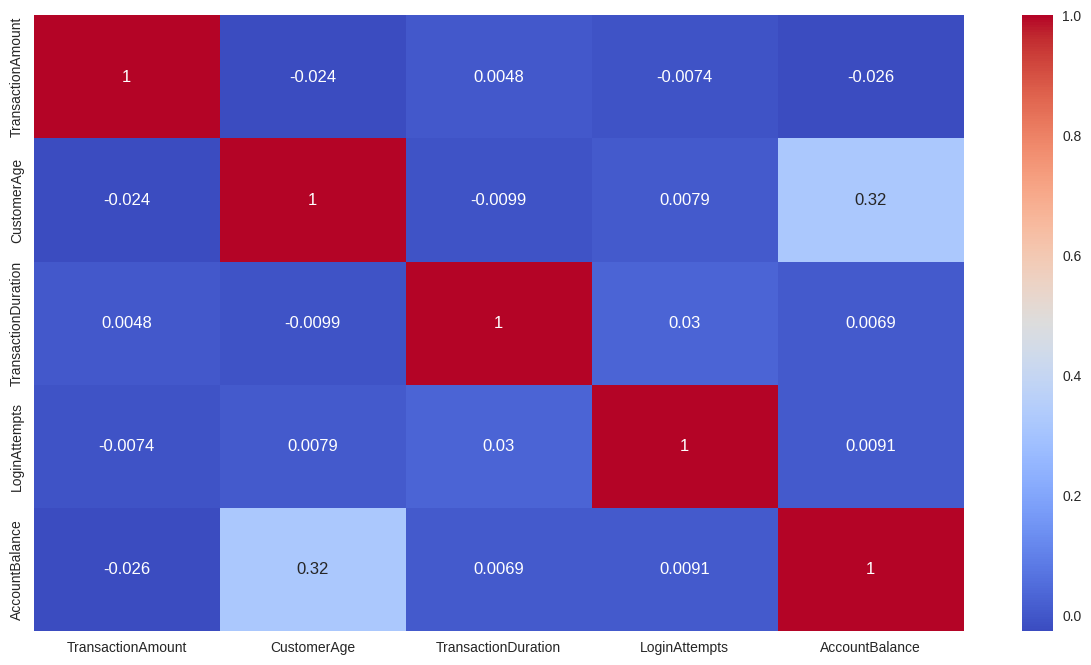

In [147]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(15, 8))

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

array([[<Axes: title={'center': 'TransactionAmount'}>,
        <Axes: title={'center': 'PreviousTransactionDate'}>,
        <Axes: title={'center': 'CustomerAge'}>],
       [<Axes: title={'center': 'TransactionDuration'}>,
        <Axes: title={'center': 'LoginAttempts'}>,
        <Axes: title={'center': 'AccountBalance'}>],
       [<Axes: title={'center': 'TransactionDate'}>, <Axes: >, <Axes: >]],
      dtype=object)

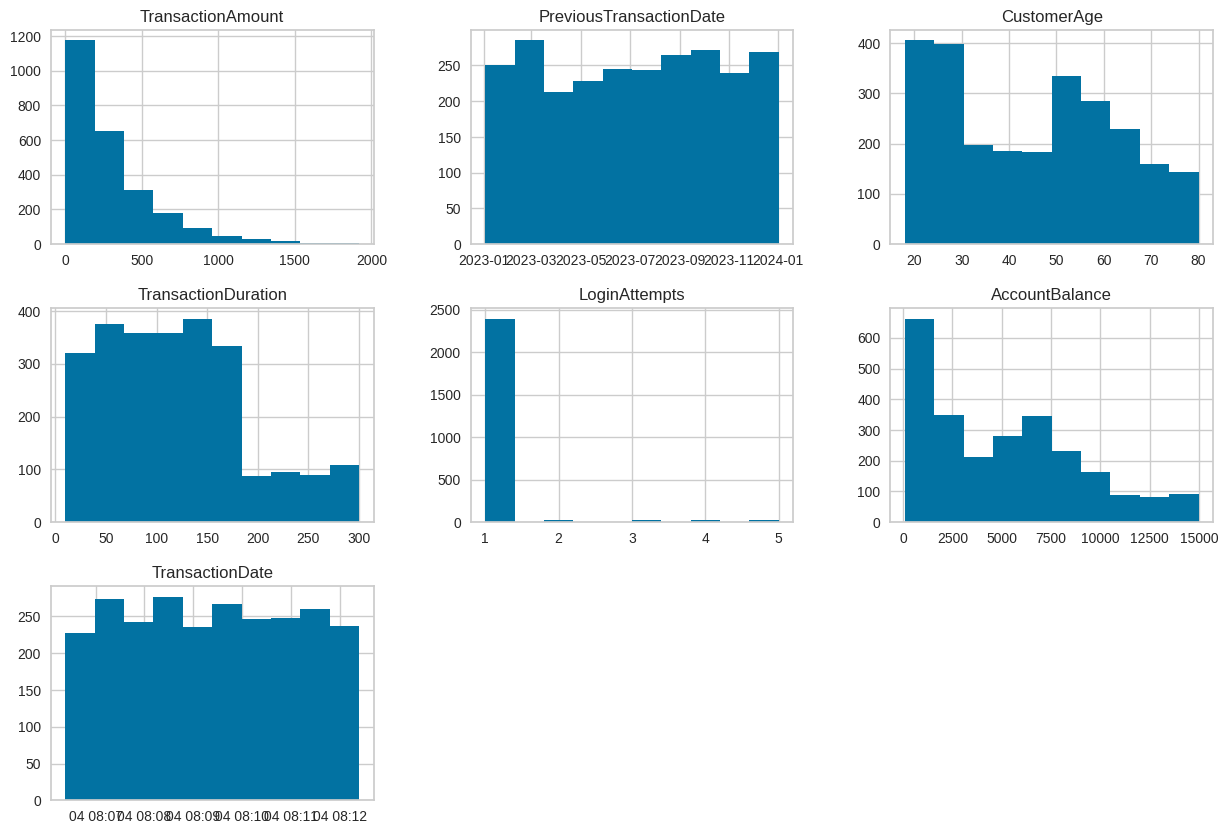

In [148]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(figsize = (15, 10))

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

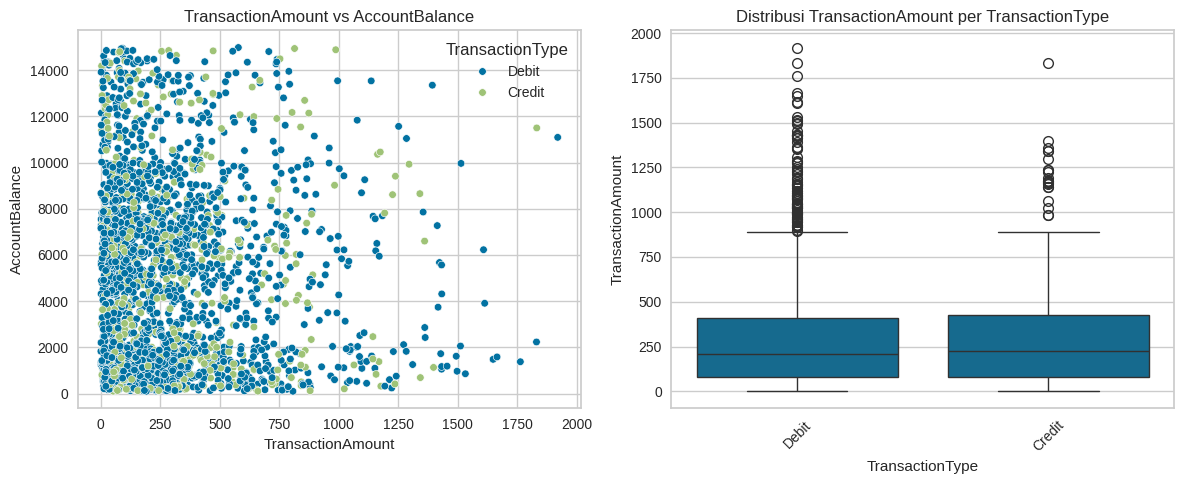

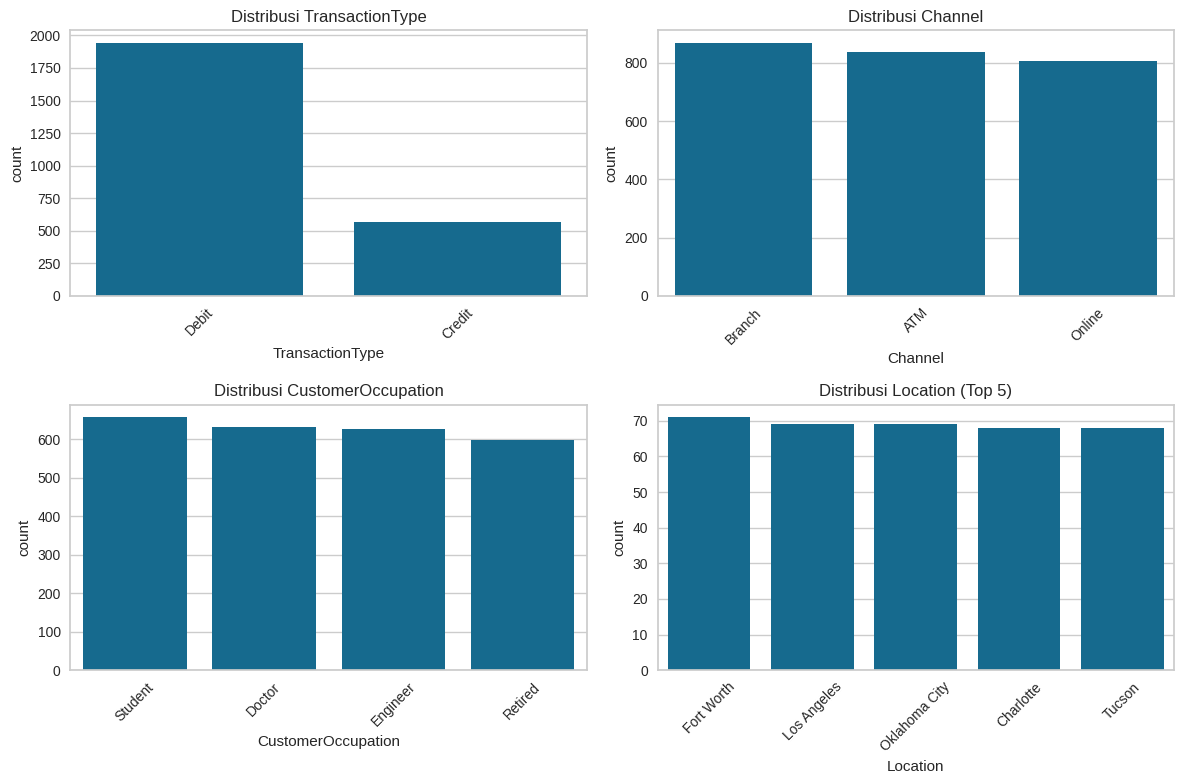

In [149]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# --------------
# Hubungan Variabel
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 baris, 2 kolom
sns.scatterplot(
    data=df,
    x="TransactionAmount",
    y="AccountBalance",
    hue="TransactionType",
    s=30,
    ax=axes[0]
)
axes[0].set_title("TransactionAmount vs AccountBalance")

sns.boxplot(
    data=df,
    x="TransactionType",
    y="TransactionAmount",
    ax=axes[1]
)
axes[1].set_title("Distribusi TransactionAmount per TransactionType")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()
# -----------------
# distrubusi kolom kategorikal
cat_cols = ["TransactionType", "Channel", "CustomerOccupation", "Location"]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 baris, 2 kolom
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    if col == "Location":
        top5 = df[col].value_counts().nlargest(5).index
        sns.countplot(data=df[df[col].isin(top5)], x=col, order=top5, ax=ax)
        ax.set_title(f"Distribusi {col} (Top 5)")
    else:
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=ax)
        ax.set_title(f"Distribusi {col}")
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [150]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [151]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [152]:
# Melakukan feature scaling menggunakan MinMaxScaler()

# -----------------------------------------------------------------------------------------
## !!! Saya izin melakukan Cleaning dan Binning terlebih dahulu sebelum melakukan scalling
#---------------- drop kolom yang tidak relevan
columns_to_drop = ["TransactionID", "AccountID", "DeviceID", "MerchantID", "IP Address"]
df = df.drop(columns=columns_to_drop)
#---------------- handle data duplikat dan missing value
df.drop_duplicates(inplace=True)
print("data duplikat : ", df.duplicated().sum())
df.dropna(inplace=True)
print("data kosong : ")
print(df.isnull().sum())
# -----------------------------------------------------------------------------------------
## !!! Binning
from sklearn.preprocessing import LabelEncoder
# Binning TransactionAmount
# Define bin edges and labels
transaction_amount_bins = [0, 100, 500, 1000, df['TransactionAmount'].max()]
transaction_amount_bins.sort()
transaction_amount_labels = ['Low', 'Medium', 'High', 'Very High'][:len(transaction_amount_bins)-1] # Adjust labels in case max() falls within a bin
df['TransactionAmount_Binned'] = pd.cut(df['TransactionAmount'], bins=transaction_amount_bins, labels=transaction_amount_labels, right=True)

# Binning CustomerAge
# Define bin edges and labels
customer_age_bins = [0, 25, 40, 60, df['CustomerAge'].max()]
customer_age_bins.sort()
customer_age_labels = ['Young', 'Adult', 'Middle-aged', 'Senior'][:len(customer_age_bins)-1] # Adjust labels in case max() falls within a bin
df['CustomerAge_Binned'] = pd.cut(df['CustomerAge'], bins=customer_age_bins, labels=customer_age_labels, right=True)

# Encode yang telah di binning dengan label encoder
label_encoder = LabelEncoder()

df['TransactionAmount_Binned_Encoded'] = label_encoder.fit_transform(df['TransactionAmount_Binned'])
df['CustomerAge_Binned_Encoded'] = label_encoder.fit_transform(df['CustomerAge_Binned'])

print("---" * 20)
print("---" * 20)
print("DataFrame after Binning and Encoding:")
display(df.head())
# -----------------------------------------------------------------------------------------
## !!! Scalling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select numerical columns
numeric_cols = ["TransactionAmount", "TransactionDuration", "AccountBalance", "CustomerAge", "LoginAttempts"]

# # Standardization (Z-score)
# scaler_standard = StandardScaler()
# df_standardized = df.copy() # Create a copy to avoid modifying the original DataFrame
# df_standardized[numeric_cols] = scaler_standard.fit_transform(df_standardized[numeric_cols])

# print("\nDataFrame after Standardization:")
# display(df_standardized.head())

# Min-Max Normalization
scaler_minmax = MinMaxScaler()
df_normalized = df.copy() # Create a copy to avoid modifying the original DataFrame
df_normalized[numeric_cols] = scaler_minmax.fit_transform(df_normalized[numeric_cols])

# -------------------------------------------------------------------------------------------

# Pastikan kamu menggunakan function head setelah melalukan scaling.
print("---" * 20)
print("---" * 20)
print("DataFrame after Min-Max Normalization:")
display(df_normalized.head())

data duplikat :  0
data kosong : 
TransactionAmount          0
PreviousTransactionDate    0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
TransactionDate            0
dtype: int64
------------------------------------------------------------
------------------------------------------------------------
DataFrame after Binning and Encoding:


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionAmount_Binned,CustomerAge_Binned,TransactionAmount_Binned_Encoded,CustomerAge_Binned_Encoded
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,Low,Senior,1,2
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,Medium,Senior,2,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,Medium,Young,2,3
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,Medium,Adult,2,0
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36,Low,Young,1,3


------------------------------------------------------------
------------------------------------------------------------
DataFrame after Min-Max Normalization:


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionAmount_Binned,CustomerAge_Binned,TransactionAmount_Binned_Encoded,CustomerAge_Binned_Encoded
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336790,2024-11-04 08:08:08,Low,Senior,1,2
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918049,2024-11-04 08:09:35,Medium,Senior,2,2
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068578,2024-11-04 08:07:04,Medium,Young,2,3
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569170,2024-11-04 08:09:06,Medium,Adult,2,0
5,0.047888,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,0.000000,Student,0.558621,0.0,0.045677,2024-11-04 08:06:36,Low,Young,1,3


In [153]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

In [154]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

In [155]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df_normalized.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate',
 'TransactionAmount_Binned',
 'CustomerAge_Binned',
 'TransactionAmount_Binned_Encoded',
 'CustomerAge_Binned_Encoded']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [156]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

In [157]:
# Menghapus data duplikat menggunakan drop_duplicates().

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [158]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

numeric_cols = ["TransactionAmount", "TransactionDuration", "AccountBalance", "CustomerAge", "LoginAttempts"]
# meggunakan capping
df_transformed = df_normalized.copy()

for col in numeric_cols:
    Q1 = df_transformed[col].quantile(0.25)
    Q3 = df_transformed[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # winsorizing
    df_transformed[col] = np.where(df_transformed[col] < lower_bound, lower_bound,
                      np.where(df_transformed[col] > upper_bound, upper_bound, df_transformed[col]))

print("Shape after capping outliers:", df_transformed.shape)

Shape after capping outliers: (2243, 15)


In [159]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

## SUDAH DILAKUKAN DI CELL SEBELUMNYA

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [160]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df_transformed.describe()

,TransactionAmount,PreviousTransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionAmount_Binned_Encoded,CustomerAge_Binned_Encoded
count,2243.000000,2243,2243.000000,2243.000000,2243.0,2243.000000,2243,2243.000000,2243.000000
mean,0.147803,2023-07-05 00:55:03.426214912,0.429041,0.378921,0.0,0.336153,2024-11-04 08:09:22.608560128,1.448061,1.354436
min,0.000000,2023-01-02 16:00:06,0.000000,0.000000,0.0,0.000000,2024-11-04 08:06:23,0.000000,0.000000
25%,0.042239,2023-03-31 17:31:09.500000,0.145161,0.182759,0.0,0.093259,2024-11-04 08:07:54,1.000000,0.000000
50%,0.110014,2023-07-06 16:04:39,0.435484,0.351724,0.0,0.307283,2024-11-04 08:09:23,2.000000,1.000000
75%,0.214378,2023-10-05 16:36:59,0.661290,0.524138,0.0,0.510542,2024-11-04 08:10:53,2.000000,2.000000
max,0.472588,2024-01-01 18:21:50,1.000000,1.000000,0.0,1.000000,2024-11-04 08:12:23,3.000000,3.000000
std,0.130805,NaN,0.287969,0.244613,0.0,0.262919,NaN,0.784751,1.058761


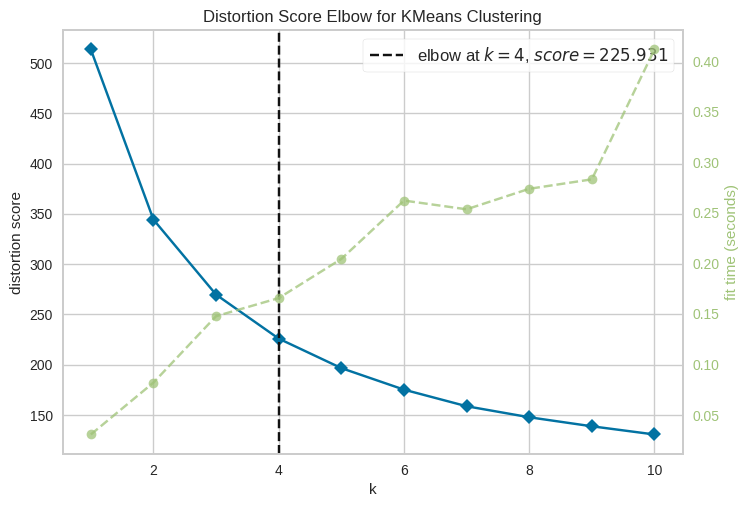

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [161]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

X = df_transformed[numeric_cols]

model = KMeans(random_state=42, n_init=50)
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(X)

visualizer.show()

In [162]:
# Menggunakan algoritma K-Means Clustering

from sklearn.cluster import KMeans

# Apply KMeans clustering with the optimal number of clusters (based on Elbow method)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=50) # pemilihan jumlah cluster = 3 telah dipilih berdasarkan trial dan error melalui evaluasi silhouette score
df_transformed['Cluster'] = kmeans.fit_predict(X)

print("DataFrame with Cluster Labels:")
display(df_transformed.head())

DataFrame with Cluster Labels:


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionAmount_Binned,CustomerAge_Binned,TransactionAmount_Binned_Encoded,CustomerAge_Binned_Encoded,Cluster
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336790,2024-11-04 08:08:08,Low,Senior,1,2,2
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918049,2024-11-04 08:09:35,Medium,Senior,2,2,0
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068578,2024-11-04 08:07:04,Medium,Young,2,3,1
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569170,2024-11-04 08:09:06,Medium,Adult,2,0,0
5,0.047888,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,0.000000,Student,0.558621,0.0,0.045677,2024-11-04 08:06:36,Low,Young,1,3,1


Jalankan cell code ini untuk menyimpan model kamu.

In [163]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [164]:
# Menghitung dan menampilkan nilai Silhouette Score.
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(X, df_transformed['Cluster'])

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.30191604296687025


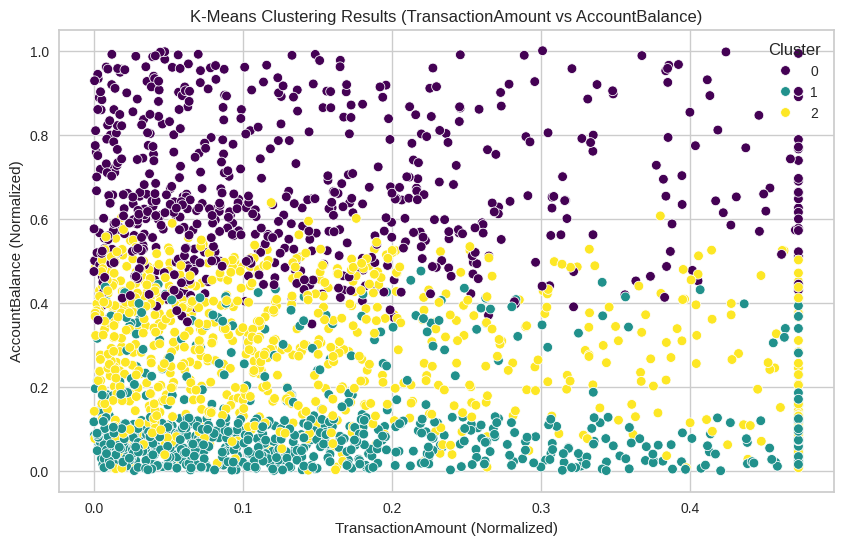

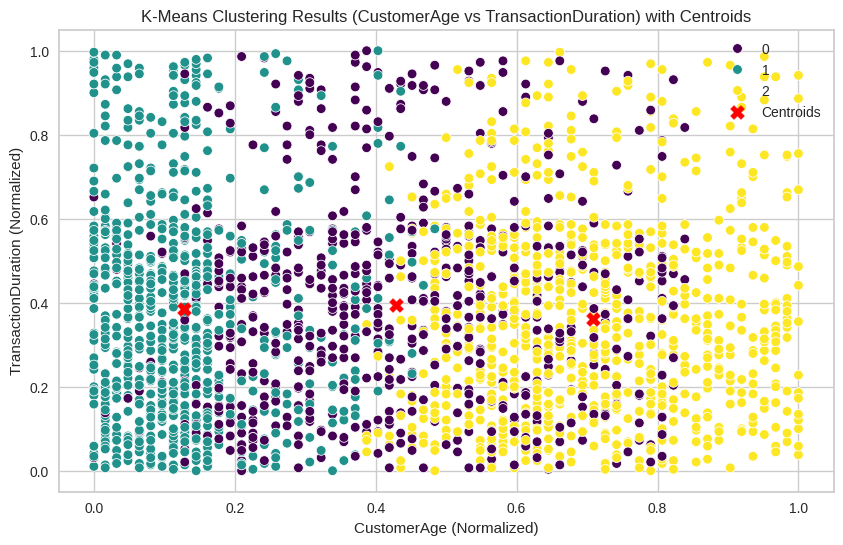

In [165]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_transformed, x='TransactionAmount', y='AccountBalance', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering Results (TransactionAmount vs AccountBalance)')
plt.xlabel('TransactionAmount (Normalized)')
plt.ylabel('AccountBalance (Normalized)')
plt.show()

# visualisasi cluster dengan fitur yang berbeda dan menggunakan centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_transformed, x='CustomerAge', y='TransactionDuration', hue='Cluster', palette='viridis', legend='full')

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, numeric_cols.index('CustomerAge')], centroids[:, numeric_cols.index('TransactionDuration')], marker='X', s=100, color='red', label='Centroids')

plt.title('K-Means Clustering Results (CustomerAge vs TransactionDuration) with Centroids')
plt.xlabel('CustomerAge (Normalized)')
plt.ylabel('TransactionDuration (Normalized)')
plt.legend()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

DataFrame after PCA and K-Means Clustering on PCA-transformed data:


,PCA1,PCA2,Cluster_PCA
0,0.331219,-0.153286,0
1,0.650160,0.106179,2
2,-0.485780,-0.223337,1
3,-0.092377,-0.290521,0
4,-0.518378,0.173315,1


Silhouette Score for PCA clustering: 0.3903520376352844


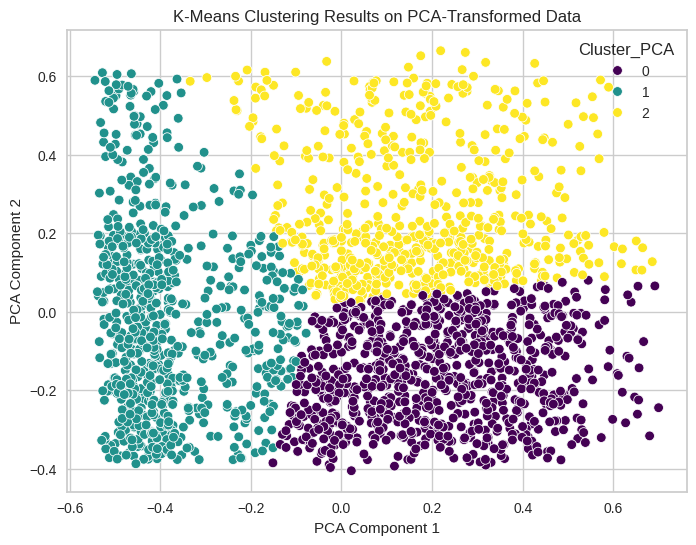

In [166]:
# Membangun model menggunakan PCA.
from sklearn.decomposition import PCA

# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=50)
kmeans_pca.fit(df_pca)

df_pca['Cluster_PCA'] = kmeans_pca.labels_

print("DataFrame after PCA and K-Means Clustering on PCA-transformed data:")
display(df_pca.head())

# Kalkulasi Silhouette Score untuk PCA clustering
silhouette_avg_pca = silhouette_score(df_pca[['PCA1', 'PCA2']], df_pca['Cluster_PCA'])

print(f"Silhouette Score for PCA clustering: {silhouette_avg_pca}")

# Visualisasi 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster_PCA', palette='viridis', legend='full')
plt.title('K-Means Clustering Results on PCA-Transformed Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [167]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

### **1. Numerical Features (Mean, Min, Max per Cluster)**

**TransactionAmount**

* **Cluster 0**: Rata-rata relatif rendah (0.144), min sangat kecil (\~0.00003), max mendekati 0.47.
* **Cluster 1**: Mirip dengan cluster 0 (mean 0.152), distribusi hampir sama (0 – 0.47).
* **Cluster 2**: Mean sedikit lebih tinggi dari Cluster 0/1 (0.146), range juga sama.
  Artinya, tidak ada perbedaan mencolok antar cluster dalam besaran transaksi (nilai transaksi relatif seragam).

**TransactionDuration**

* **Cluster 0**: Durasi rata-rata lebih tinggi (0.394) dibanding cluster lain.
* **Cluster 1**: Rata-rata 0.384, cukup mirip cluster 0.
* **Cluster 2**: Paling rendah (0.361).
  Durasi transaksi sedikit lebih panjang di Cluster 0.

**AccountBalance**

* **Cluster 0**: Paling tinggi (mean 0.659, range 0.35 – 1).
* **Cluster 1**: Sangat rendah (mean 0.109, range 0 – 0.47).
* **Cluster 2**: Menengah (mean 0.291, range 0 – 0.64).
  Ini **pembeda utama antar cluster**: saldo nasabah di Cluster 0 jauh lebih tinggi, Cluster 1 sangat rendah, dan Cluster 2 sedang.

**CustomerAge**

* **Cluster 0**: Usia rata-rata menengah (0.429).
* **Cluster 1**: Usia muda (mean 0.128).
* **Cluster 2**: Usia tua (mean 0.709, range sampai 1).
  **Cluster 1 = pelanggan muda**, **Cluster 2 = pelanggan lebih tua**, **Cluster 0 = paruh baya**.

**LoginAttempts**

* Semua cluster tercatat 0 (mean, min, max = 0).
  Variabel ini tidak berkontribusi dalam pemisahan cluster (kurang informatif).

---

### **2. Categorical Features (Mode per Cluster)**

**TransactionType**

* Semua cluster dominan **Debit**.
  Jenis transaksi tidak terlalu membedakan cluster.

**Channel**

* **Cluster 0 & 1**: Didominasi transaksi via **Branch**.
* **Cluster 2**: Lebih banyak transaksi via **ATM**.
  Cluster 2 cenderung menggunakan ATM, berbeda dari cluster lainnya.

**CustomerOccupation**

* **Cluster 0**: Mayoritas **Doctor**.
* **Cluster 1**: Mayoritas **Student**.
* **Cluster 2**: Mayoritas **Retired**.
  Keterkaitan jelas antara usia (numerik) dan pekerjaan (kategori).

**Location**

* **Cluster 0**: San Jose.
* **Cluster 1**: Miami.
* **Cluster 2**: Charlotte.
  Lokasi bisa jadi sekadar dominan, belum tentu signifikan.

---

### **3. Ringkasan Karakteristik Tiap Cluster**

* **Cluster 0** → Nasabah **paruh baya**, saldo tinggi, mayoritas dokter, sering transaksi debit via cabang (Branch).
* **Cluster 1** → Nasabah **muda**, saldo rendah, mayoritas pelajar, transaksi debit via cabang.
* **Cluster 2** → Nasabah **lebih tua**, saldo sedang, mayoritas pensiunan, transaksi debit via ATM.


In [168]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

# ------------------------------------------------------------------------------------------------------------------------------
# Perform descriptive analysis on the inverse-transformed data, grouped by 'Target' cluster
print("Analisis Deskriptif untuk data grouped by Cluster:")
# Numerical features: mean, min, max
numerical_summary = df_transformed.groupby('Cluster')[numeric_cols].agg(['mean', 'min', 'max'])
print("\nNumerical Feature Summary (Mean, Min, Max):")
display(numerical_summary)
# Categorical features: mode
categorical_summary = {}
for col in cat_cols:
    categorical_summary[col] = df_transformed.groupby('Cluster')[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'N/A')
print("\nCategorical Feature Mode:")
display(pd.DataFrame(categorical_summary))
# ------------------------------------------------------------------------------------------------------------------------------
print("-----" * 20)
print("-----" * 20)

# Analyze the distribution of categorical features within each cluster
for col in cat_cols:
    print(f"\nDistribution of {col} within each cluster:")
    display(pd.crosstab(df_transformed['Cluster'], df_transformed[col]))

Analisis Deskriptif untuk data grouped by Cluster:

Numerical Feature Summary (Mean, Min, Max):


TransactionAmount                     TransactionDuration       \
                     mean       min       max                mean  min   
Cluster                                                                  
0                0.144316  0.000031  0.472588            0.394575  0.0   
1                0.152363  0.000000  0.472588            0.384366  0.0   
2                0.146330  0.000302  0.472588            0.361415  0.0   

                  AccountBalance                     CustomerAge            \
              max           mean       min       max        mean       min   
Cluster                                                                      
0        1.000000       0.658948  0.349336  1.000000    0.429269  0.000000   
1        1.000000       0.109027  0.000000  0.475436    0.128001  0.000000   
2        0.996552       0.291037  0.001256  0.638368    0.709050  0.387097   

                  LoginAttempts            
              max          mean  min  max  
Cluster                                    
0        0.838710           0.0  0.0  0.0  
1        0.483871           0.0  0.0  0.0  
2        1.000000           0.0  0.0  0.0


Categorical Feature Mode:


,TransactionType,Channel,CustomerOccupation,Location
Cluster,,,,
0,Debit,Branch,Doctor,San Jose
1,Debit,Branch,Student,Miami
2,Debit,ATM,Retired,Charlotte


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

Distribution of TransactionType within each cluster:


TransactionType,Credit,Debit
Cluster,,
0,154,500
1,161,605
2,191,632



Distribution of Channel within each cluster:


Channel,ATM,Branch,Online
Cluster,,,
0,216,230,208
1,246,273,247
2,284,282,257



Distribution of CustomerOccupation within each cluster:


CustomerOccupation,Doctor,Engineer,Retired,Student
Cluster,,,,
0,399,222,9,24
1,45,152,0,569
2,127,175,521,0



Distribution of Location within each cluster:


Location,Albuquerque,Atlanta,Austin,Baltimore,Boston,Charlotte,Chicago,Colorado Springs,Columbus,Dallas,...,Raleigh,Sacramento,San Antonio,San Diego,San Francisco,San Jose,Seattle,Tucson,Virginia Beach,Washington
Cluster,,,,,,,,,,,,,,,,,,,,,
0,10,17,12,12,14,13,7,17,14,15,...,14,18,10,21,11,24,19,22,17,8
1,12,21,17,17,24,22,22,16,13,12,...,16,15,22,18,22,16,25,22,20,16
2,12,15,25,13,18,27,26,18,23,15,...,22,16,18,17,19,14,13,17,17,19


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

### **Cluster 0: (Profesional, Saldo Tinggi, Usia Produktif)**

* **Numerical**:

  * Transaction Amount moderat (0.14).
  * Balance **tinggi** (0.65 → tertinggi dibanding cluster lain).
  * Usia menengah (0.42 → usia produktif).
  * Transaction Duration moderat.
  * Login Attempts = 0.
* **Categorical**:

  * Debit dominan (500 vs 154 Credit).
  * Channel relatif seimbang (ATM, Branch, Online).
  * Didominasi **Doctor (399)** dan **Engineer (222)**.
* **Analisis**:
  Cluster ini berisi profesional dengan saldo tinggi, usia produktif, dan aktivitas transaksi debit yang dominan. Mereka cenderung stabil secara finansial dengan kebutuhan layanan perbankan lebih kompleks.
* **Rekomendasi**: tawarkan **produk premium banking, investasi, kredit properti/alat kerja, dan layanan prioritas**.

---

### **Cluster 1: (Mahasiswa Aktif, Saldo Rendah, Transaksi Debit)**

* **Numerical**:

  * Transaction Amount relatif tinggi (0.15 → tertinggi di antara cluster).
  * Balance **rendah** (0.10 → cluster dengan saldo terendah).
  * Usia muda (0.12).
  * Duration moderat.
  * Login Attempts = 0.
* **Categorical**:

  * Debit dominan (605 vs 161 Credit).
  * Channel relatif seimbang.
  * Didominasi oleh **Student (569)**.
* **Analisis**:
  Cluster ini adalah mahasiswa yang aktif bertransaksi dengan saldo rendah, transaksi banyak di debit, dan aktif di berbagai channel.
* **Rekomendasi**: fokus ke **tabungan mahasiswa, promo kecil (e-wallet, diskon belanja), atau edukasi finansial**.

---

### **Cluster 2: (Retired & Dewasa, Saldo Menengah, Usia Tinggi)**

* **Numerical**:

  * Transaction Amount moderat.
  * Balance menengah (0.29).
  * Usia tinggi (0.70 → cluster dengan usia paling senior).
  * Transaction Duration moderat.
  * Login Attempts = 0.
* **Categorical**:

  * Debit dominan (632 vs 191 Credit).
  * Channel seimbang.
  * Didominasi **Retired (521)**, juga ada Engineer (175) & Doctor (127).
* **Analisis**:
  Cluster ini berisi nasabah pensiunan dengan saldo menengah, usia senior, dan aktivitas debit yang dominan. Mereka lebih stabil tapi cenderung konservatif dalam transaksi.
* **Rekomendasi**: tawarkan **produk pensiun, proteksi kesehatan/asuransi, deposito dengan bunga menarik, dan customer service personal**.

---

## **Ringkasan**

* **Cluster 0** → Profesional usia produktif, saldo tinggi → produk premium & investasi.
* **Cluster 1** → Mahasiswa aktif, saldo rendah → tabungan mahasiswa & promo transaksi kecil.
* **Cluster 2** → Retired & dewasa senior, saldo menengah → produk pensiun & proteksi kesehatan.



# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [169]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_transformed = df_transformed.rename(columns={'Cluster': 'Target'})

In [170]:
# Simpan Data
df_transformed.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [171]:
# inverse dataset ke rentang normal untuk numerikal
df_inverse_transformed = df_transformed.copy()
df_inverse_transformed[numeric_cols] = scaler_minmax.inverse_transform(df_transformed[numeric_cols])

display(df_inverse_transformed.head())

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionAmount_Binned,CustomerAge_Binned,TransactionAmount_Binned_Encoded,CustomerAge_Binned_Encoded,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,Low,Senior,1,2,2
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,Medium,Senior,2,2,0
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,Medium,Young,2,3,1
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,Medium,Adult,2,0,0
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36,Low,Young,1,3,1


In [172]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# --> karena sebelumnya saya encode dan dijadikan fitur baru, jadi saya hanya perlu drop encoded feature aja
df_original = df_inverse_transformed.copy()
df_original = df_original.drop(columns=[
    "TransactionAmount_Binned",
    "CustomerAge_Binned",
    "TransactionAmount_Binned_Encoded",
    "CustomerAge_Binned_Encoded"
])

In [173]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
print("Descriptive analysis of inverse-transformed data grouped by Cluster:")

numerical_summary = df_original.groupby('Target')[numeric_cols].agg(['mean', 'min', 'max'])
print("\nNumerical Feature Summary (Mean, Min, Max):")
display(numerical_summary)

categorical_summary = {}
for col in cat_cols:
    categorical_summary[col] = df_original.groupby('Target')[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'N/A')

print("\nCategorical Feature Mode:")
display(pd.DataFrame(categorical_summary))

for col in cat_cols:
    print(f"\nDistribution of {col} within each cluster:")
    display(pd.crosstab(df_original['Target'], df_original[col]))

Descriptive analysis of inverse-transformed data grouped by Cluster:

Numerical Feature Summary (Mean, Min, Max):


TransactionAmount                TransactionDuration               \
                    mean   min      max                mean   min    max   
Target                                                                     
0             277.181009  0.32  907.085          124.426606  10.0  300.0   
1             292.621586  0.26  907.085          121.466057  10.0  300.0   
2             281.046264  0.84  907.085          114.810450  10.0  299.0   

       AccountBalance                    CustomerAge              \
                 mean      min       max        mean   min   max   
Target                                                             
0         9904.569327  5298.85  14977.99   44.614679  18.0  70.0   
1         1724.069674   102.20   7174.69   25.936031  18.0  48.0   
2         4431.603171   120.89   9598.43   61.961118  42.0  80.0   

       LoginAttempts            
                mean  min  max  
Target                          
0                1.0  1.0  1.0  
1                1.0  1.0  1.0  
2                1.0  1.0  1.0


Categorical Feature Mode:


,TransactionType,Channel,CustomerOccupation,Location
Target,,,,
0,Debit,Branch,Doctor,San Jose
1,Debit,Branch,Student,Miami
2,Debit,ATM,Retired,Charlotte



Distribution of TransactionType within each cluster:


TransactionType,Credit,Debit
Target,,
0,154,500
1,161,605
2,191,632



Distribution of Channel within each cluster:


Channel,ATM,Branch,Online
Target,,,
0,216,230,208
1,246,273,247
2,284,282,257



Distribution of CustomerOccupation within each cluster:


CustomerOccupation,Doctor,Engineer,Retired,Student
Target,,,,
0,399,222,9,24
1,45,152,0,569
2,127,175,521,0



Distribution of Location within each cluster:


Location,Albuquerque,Atlanta,Austin,Baltimore,Boston,Charlotte,Chicago,Colorado Springs,Columbus,Dallas,...,Raleigh,Sacramento,San Antonio,San Diego,San Francisco,San Jose,Seattle,Tucson,Virginia Beach,Washington
Target,,,,,,,,,,,,,,,,,,,,,
0,10,17,12,12,14,13,7,17,14,15,...,14,18,10,21,11,24,19,22,17,8
1,12,21,17,17,24,22,22,16,13,12,...,16,15,22,18,22,16,25,22,20,16
2,12,15,25,13,18,27,26,18,23,15,...,22,16,18,17,19,14,13,17,17,19


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.

### **Cluster 0: (Profesional, Saldo Tinggi, Usia Produktif)**

* **Numerical**:

  * Transaction Amount: 277 ribu (moderate).
  * Transaction Duration: 124 detik (moderate).
  * **Account Balance sangat tinggi** (±9.9 ribu → tertinggi antar cluster).
  * Usia rata-rata 44 tahun (usia produktif).
  * Login Attempts = 1.
* **Categorical**:

  * Debit dominan (500 vs 154 Credit).
  * Channel seimbang (ATM, Branch, Online hampir rata).
  * Didominasi **Doctor (399)** dan **Engineer (222)**.
* **Analisis**:
  Nasabah profesional dengan saldo besar, usia produktif, dan dominasi transaksi debit.
* **Rekomendasi**: tawarkan **produk investasi, premium banking, layanan prioritas, dan kredit produktif**.

---

### **Cluster 1: (Mahasiswa Aktif, Saldo Rendah, Usia Muda)**

* **Numerical**:

  * Transaction Amount: 292 ribu (paling tinggi).
  * Transaction Duration: 121 detik (moderate).
  * **Account Balance rendah** (±1.7 ribu → terendah antar cluster).
  * Usia rata-rata 25 tahun (nasabah muda).
  * Login Attempts = 1.
* **Categorical**:

  * Debit dominan (605 vs 161 Credit).
  * Channel seimbang (semua hampir proporsional).
  * Didominasi **Student (569)**.
* **Analisis**:
  Nasabah mahasiswa aktif bertransaksi dengan saldo kecil, dominasi debit, dan usia muda.
* **Rekomendasi**: fokus pada **produk tabungan mahasiswa, promo transaksi kecil, cashback, dan edukasi keuangan**.

---

### **Cluster 2: (Retired & Dewasa Senior, Saldo Menengah, Usia Tinggi)**

* **Numerical**:

  * Transaction Amount: 281 ribu (mirip cluster lain).
  * Transaction Duration: 114 detik (paling rendah → transaksi lebih cepat).
  * **Account Balance menengah** (±4.4 ribu).
  * Usia rata-rata 61 tahun (paling tua).
  * Login Attempts = 1.
* **Categorical**:

  * Debit dominan (632 vs 191 Credit).
  * Channel seimbang (ATM, Branch, Online).
  * Didominasi **Retired (521)** dengan Engineer (175) & Doctor (127).
* **Analisis**:
  Nasabah pensiunan/dewasa senior dengan saldo menengah, transaksi debit cepat, dan usia lanjut.
* **Rekomendasi**: tawarkan **produk pensiun, asuransi kesehatan, deposito, layanan customer care yang lebih personal**.

---

## **Ringkasan**

* **Cluster 0** → Profesional usia produktif, saldo tinggi → produk premium & investasi.
* **Cluster 1** → Mahasiswa aktif, saldo rendah → tabungan mahasiswa & promo kecil.
* **Cluster 2** → Retired & dewasa senior, saldo menengah → produk pensiun & proteksi kesehatan.



(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [174]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_original.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,2
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,0
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,1
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,0
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36,1


In [175]:
# Simpan Data
df_original.to_csv('data_clustering_inverse.csv', index=False)
print("DataFrame with inverse-transformed data and cluster labels saved to 'data_clustering_inverse.csv'")

DataFrame with inverse-transformed data and cluster labels saved to 'data_clustering_inverse.csv'


End of Code.